# Image Classification

In [2]:
from PIL import Image
import requests
from transformers import pipeline

In [3]:
url = "https://res.cloudinary.com/dk-find-out/image/upload/q_80,w_1920,f_auto/DCTM_Penguin_UK_DK_AL697473_RGB_PNG_namnse.jpg"

image = Image.open(requests.get(url, stream=True).raw)

In [4]:
classifier = pipeline("image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

C:\Users\HP\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\models--google--vit-base-patch16-224. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [5]:
outputs = classifier(image)
outputs

[{'label': 'Egyptian cat', 'score': 0.9214349985122681},
 {'label': 'tabby, tabby cat', 'score': 0.05821960046887398},
 {'label': 'tiger cat', 'score': 0.012601815164089203},
 {'label': 'lynx, catamount', 'score': 0.0037278365343809128},
 {'label': 'Siamese cat, Siamese', 'score': 0.00040071294642984867}]

In [6]:
url = "https://img.freepik.com/free-photo/young-bearded-man-with-striped-shirt_273609-5677.jpg"

image = Image.open(requests.get(url, stream=True).raw)
classifier = pipeline("image-classification", model="nateraw/vit-age-classifier")

outputs = classifier(image)
outputs


config.json:   0%|          | 0.00/850 [00:00<?, ?B/s]

C:\Users\HP\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\models--nateraw--vit-age-classifier. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/197 [00:00<?, ?B/s]

[{'label': '30-39', 'score': 0.5539417266845703},
 {'label': '20-29', 'score': 0.3924492597579956},
 {'label': '40-49', 'score': 0.05089537426829338},
 {'label': '10-19', 'score': 0.0015152229461818933},
 {'label': '50-59', 'score': 0.0009514859411865473}]

# Image Segmentation

In [7]:
url = "https://img.freepik.com/free-photo/young-bearded-man-with-striped-shirt_273609-5677.jpg"

image = Image.open(requests.get(url, stream=True).raw)


In [8]:
segmenter = pipeline("image-segmentation", model="mattmdjaga/segformer_b2_clothes")
outputs = segmenter(image)

outputs

config.json:   0%|          | 0.00/1.73k [00:00<?, ?B/s]

C:\Users\HP\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\models--mattmdjaga--segformer_b2_clothes. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/109M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

[{'score': None,
  'label': 'Background',
  'mask': <PIL.Image.Image image mode=L size=626x417>},
 {'score': None,
  'label': 'Hair',
  'mask': <PIL.Image.Image image mode=L size=626x417>},
 {'score': None,
  'label': 'Upper-clothes',
  'mask': <PIL.Image.Image image mode=L size=626x417>},
 {'score': None,
  'label': 'Face',
  'mask': <PIL.Image.Image image mode=L size=626x417>}]

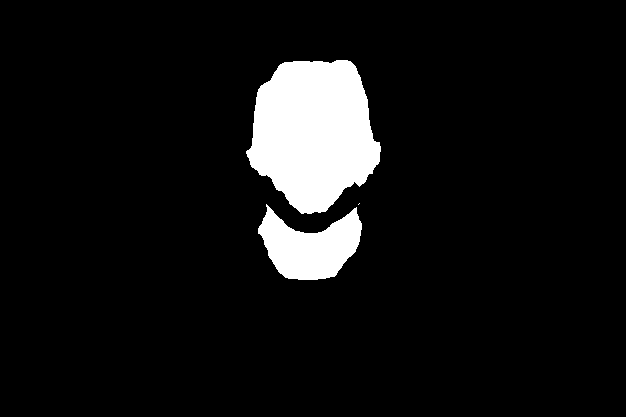

In [9]:
outputs[3]['mask']